In [9]:
import mne
# %matplotlib qt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data_path = r'../../static/eeg_data/panina1.set'

In [10]:
#Importing data and cropping for 
raw = mne.io.read_raw_eeglab(data_path, preload=True)
raw.load_data()

Reading S:\MYFILES\programming\Python\Research work\Research work\cmd\eeg_processing\..\..\static\eeg_data\panina1.fdt
Reading 0 ... 46596  =      0.000 ...   465.960 secs...


<RawEEGLAB | panina1.fdt, 19 x 46597 (466.0 s), ~6.8 MB, data loaded>

In [12]:
#Printing raw's info
n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute
print(
    f"the (cropped) sample data object has {n_time_samps} time samples and "
    f"{n_chan} channels."
)
print(f"The last time sample is at {time_secs[-1]} seconds.")
print("The first few channel names are {}.".format(", ".join(ch_names[:])))
print()  # insert a blank line in the output

# some examples of raw.info:
print("bad channels:", raw.info["bads"])  # chs marked "bad" during acquisition
print(raw.info["sfreq"], "Hz")  # sampling frequency
print(raw.info["description"], "\n")  # miscellaneous acquisition info

the (cropped) sample data object has 46597 time samples and 19 channels.
The last time sample is at 465.96 seconds.
The first few channel names are Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, P4, P8, O1, O2.

bad channels: []
100.0 Hz
None 


# Plotting data using matplotlib instruments
#### Plotting 1 channel

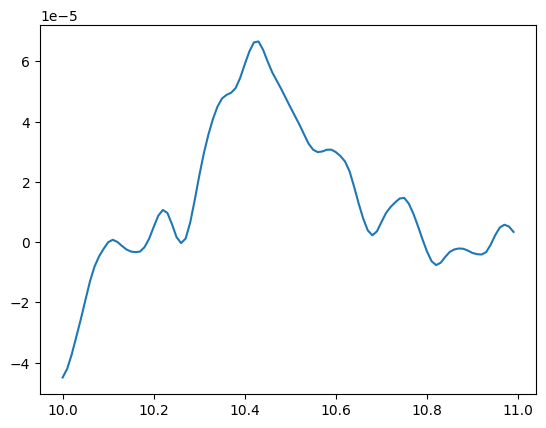

In [11]:
#Plotting data using matplotlib
# %matplotlib inline
freqs = raw.info['sfreq']
start_stop_seconds = np.array([10,11])
start_index,stop_index = (start_stop_seconds * freqs).astype(int)
channel_index = 0
raw_sample = raw[channel_index,start_index:stop_index]

x = raw_sample[1]
y = raw_sample[0].T
plt.plot(x,y)

#### Plotting 2 channels by names

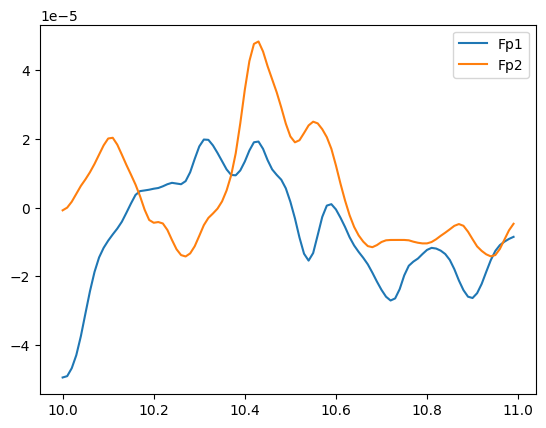

In [13]:
#Plotting raw data by channels names
# %matplotlib inline
сh_names = raw.info['ch_names']
sample_channels = ch_names[5:7]
two_meg_chans = raw[sample_channels, start_index:stop_index]
# y_offset = ([6e-5,0])
x = two_meg_chans[1]
y = two_meg_chans[0].T #+ y_offset

lines = plt.plot(x,y)
plt.legend(lines, ch_names)

# Built-in plotting methods MNE lib

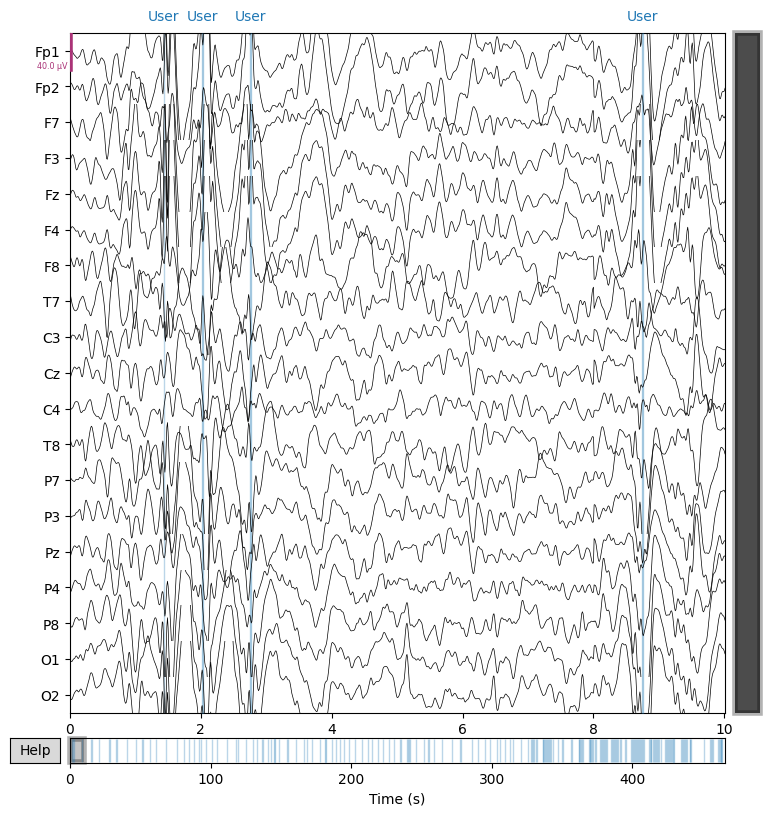

In [14]:
# Interactive data browsing
%matplotlib tk
raw.plot()

Effective window size : 20.480 (s)
Plotting power spectral density (dB=True).


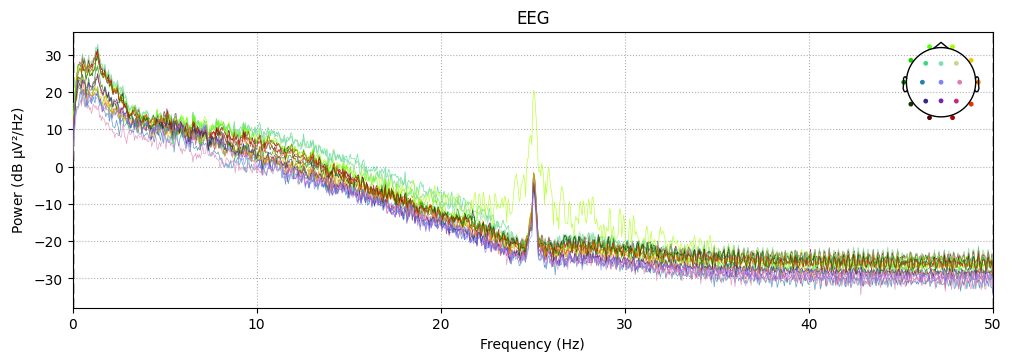

In [15]:
# Spectral density of continuous data
# %matplotlib inline
spectrum = raw.compute_psd()
spectrum.plot(average = False, picks = "data", exclude = "bads", amplitude = False)